# Replication of the Quantitative Analysis in Afrouzi and Yang (2020)

This notebook replicates the qunatitative analysis in [Afrouzi and Yang (2020)](http://www.afrouzi.com/dynamic_inattention.pdf) using the methods and the [solver](https://github.com/afrouzi/DRIPs.jl) from [Afrouzi and Yang (2020)](http://www.afrouzi.com/dynamic_inattention.pdf).

## Contents
* Setup
* A Three-Equation RI Model
* Matrix Representation
* Initialization
* Functions
* Solution
    * Post-Volcker Calibration
    * Pre-Volcker Calibration
* Simulation
* Impulse Response Functions

## Setup

### Households

Households are fully rational and maximize their life-time utilities:
$$
\begin{aligned}
\max & \ \ \mathbb{E}_{t}^{f}\left[\sum_{t=0}^{\infty}\beta^{t}\left(\frac{C_{t}^{1-\sigma}}{1-\sigma}-\frac{\int_{0}^{1}L_{i,t}^{1+\psi}di}{1+\psi}\right)\right]\\
\text{s.t.} & \ \ \int P_{i,t}C_{i,t} di+B_{t}\leq R_{t-1}B_{t-1}+\int_{0}^{1}W_{i,t}L_{i,t}di+\Pi_{t}, \quad \text{for all } t
\end{aligned}
$$
where
$$
\begin{aligned}
C_{t} = \left(\int C_{i,t} ^{\frac{\theta-1}{\theta}}di\right)^{\frac{\theta}{\theta-1}}.
\end{aligned}
$$
Here $\mathbb{E}_{t}^{f}\left[\cdot\right]$ is the full information rational expectation operator at time $t$. Since the main purpose of this paper is to study the effects of nominal rigidity and rational inattention among firms, I assume that the household is fully informed about all prices and wages. $B_{t}$ is the demand for nominal bond and $R_{t-1}$ is the nominal interest rate. $L_{i,t}$ is firm-specific labor supply of the household, $W_{i,t}$ is the firm-specific nominal wage, and $\Pi_{t}$ is the aggregate profit from the firms. $C_{t}$ is the aggregator over the consumption for goods produced by firms. $\theta$ is the constant elasticity of substitution across different firms.


### Firms
There is a measure one of firms, indexed by $i$, that operate in monopolistically competitive markets. Firms take wages and demands for their goods as given, and choose their prices $P_{i,t}$ based on their information set, $S_{i}^{t}$, at that time.  After setting their prices, firms hire labor from a competitive labor market and produce the realized level of demand that their prices induce with a production function,
$$
\begin{aligned}
    Y_{i,t} = A_{t} L_{i,t},
\end{aligned}
$$
where $L_{i,t}$ is firm $i$'s demand for labor. I assume that shocks to $A_{t}$ are independently and identically distributed and the log of the productivity shock, $a_{i,t}\equiv\log(A_{t})$, follows a AR(1) process:
$$
\begin{aligned}
    a_{t} = \rho_a a_{t-1} + \varepsilon_{a,t}, \ \   \varepsilon_{a,t} \sim N(0,\sigma_{a}^2).
\end{aligned}
$$
Then, firm $i$'s nominal profit from sales of all goods at prices $\{P_{i,j,t}\}_{j=1}^N$ is given by
$$
\begin{aligned}
\Pi_{i,t} (P_{i,t},A_{t},W_{i,t},P_t,Y_t) =\left(P_{i,t}-W_{i,t}A_{t}\right) \left(\frac{P_{i,t}}{P_{t}}\right)^{-\theta}Y_{t},
\end{aligned}
$$
where $Y_t$ is the nominal aggregate demand.

At each period, firms optimally decide their prices and signals subject to costs of processing information. Firms are rationally inattentive in a sense that they choose their optimal information set by taking into account the cost of obtaining and processing information. At the beginning of period $t$, firm $i$ wakes up with its initial information set, $S_{i}^{t-1}$. Then it chooses optimal signals, $s_{i,t}$, from a set of available signals, $\mathcal{S}_{i,t}$, subject to the cost of information which is linear in Shannon's mutual information function. Denote $ \omega $ as the marginal cost of information processing. Firm $i$ forms a new information set, $S_i^t = S_i^{t-1} \cup s_{i,t}$, and sets its new prices, $P_{i,t}$, based on that.

The firm $i$ chooses a set of signals to observe over time $(s_{i,t} \in  \mathcal{S}_{i,t})_{t=0}^\infty$ and a pricing strategy that maps the set of its prices at $t-1$ and its information set at $t$ to its optimal price at any given period, $P_{i,t}:(S_i^t)\rightarrow \mathbb{R}$ where $S_i^t=S_i^{t-1}\cup s_{i,t} = S_i^{-1} \cup \{s_{i,\tau}\}_{\tau=0}^t$ is the firm's information set at time $t$.  Then, the firm $i$'s problem is to maximize the net present value of its life time profits given an initial information set:
$$
\begin{aligned}
\max_{\{s_{i,t}\in \mathcal{S}_{i,t},P_{i,t} (S_i^t) \}_{t\geq0}} &  \mathbb{E}\left[\sum_{t=0}^{\infty}\beta^t \Lambda_t \left\{ \Pi_{i,t} (P_{i,t},A_{t},W_{i,t},P_t,Y_t)  - \omega \mathbb{I} ( S_{i}^t ;  (A_{\tau},W_{i,\tau},P_\tau,Y_\tau)_{\tau \leq t} | S_i^{t-1} ) \right\} \Bigg| S_{i}^{-1}\right]  \\
\text{s.t.} \quad & {S}_{i}^{t}={S}_{i}^{t-1}\cup s_{i,t}
\end{aligned}
$$
where $\Lambda_t$ is the stochastic discount factor and $\mathbb{I} ( S_{i}^t ;  (A_{\tau},W_{i,\tau},P_\tau,Y_\tau)_{\tau \leq t} | S_i^{t-1} )$ is the Shannon's mutual information function.


### Monetary Policy
Monetary policy is specified as a standard Talor rule:
$$
\begin{aligned}
    R_t = (R_{t-1})^{\rho} \left( \Pi_t^{\phi_\pi} \left( \frac{Y_t}{Y_t^n} \right)^{\phi_x} \left(\frac{Y_t}{Y_{t-1}} \right)^{\phi_{\Delta y}} \right)^{1-\rho} \exp(u_t)
\end{aligned}
$$
where $u_t \sim N(0,\sigma_{u}^2)$ is the monetary policy shock.

## A Three-Equation GE Rational Inattention Model

Our general equlibrium model is characterized by the following three equations with two stochastic processes of technology ($a_{t}$) and monetary policy shocks ($u_t$):
$$
\begin{aligned}
x_{t} & =\mathbb{E}_{t}^{f}\left[x_{t+1}-\frac{1}{\sigma}\left(i_{t}-\pi_{t+1}\right)\right]+\mathbb{E}_{t}^{f}\left[y_{t+1}^{n}\right]-y_{t}^{n} \\
p_{i,t} & =\mathbb{E}_{i,t}\left[p_{t} + \alpha x_{t}\right] \\
i_{t} & =\rho i_{t-1} + \left( 1 - \rho \right) \left(\phi_{\pi} \pi_{t}+\phi_{x} x_{t} - \phi_{\Delta y} \Delta y_t \right) + u_{t}
\end{aligned}
$$
where $\mathbb{E}_{i,t}[\cdot]$ is the firm $i$'s expectation operator conditional on her time $t$ information set, $x_t = y_t - y_t^n$ is the output gap, $y_{t}^{n}=\frac{1+\psi}{\sigma+\psi}a_{t}$ is the natural level of output, $i_t$ is the nominal interest rate, and $\alpha = \frac{\sigma+\psi}{1+\psi\theta}$ is the degree of strategic complementarity.


## Matrix Representation

Firms wants to keep track of their ideal price, $p_{i,t}^* = p_t + \alpha x_t$. Notice that the state space representation for $p_{i,t}^*$ is no longer exogenous and is determined in the equilibrium. However, we know that this is a Guassian process and by Wold's theorem we can decompose it to its $MA(\infty)$ representation:
$$
\begin{aligned}
    p_{i,t}^*=\Phi_a(L)\varepsilon_{a,t} + \Phi_u(L)\varepsilon_{u,t}
\end{aligned}
$$
where $\Phi_a(.)$ and $\Phi_u(.)$ are lag polynomials. Here, we have basically guessed that the process for $p_{i,t}^*$ is determined uniquely by the history of monetary shocks which requires that rational inattention errors of firms are orthogonal (See [Afrouzi (2020)](www.afrouzi.com/strategic_inattetion.pdf)).

Since we cannot put $MA(\infty)$ processes in the computer and have to truncate them. However, we know that for stationary processes we can arbitrarily get close to the true process by truncating $MA(\infty)$ processes. Our problem here is that $p_{i,t}^*$ has a unit root and is not stationary. We can bypass this issue by re-writing the state space in the following way:
$$
\begin{aligned}
    p_{i,t}^*=\Phi_a(L)\varepsilon_{a,t} + \phi_u(L)\tilde{\varepsilon}_{u,t},\quad \tilde{\varepsilon}_{u,t}=(1-L)^{-1}\varepsilon_{u,t} =\sum_{j=0}^\infty \varepsilon_{u,t-j}
\end{aligned}
$$
here $\tilde{\varepsilon}_{u,t}$ is the unit root of the process and basically we have differenced out the unit root from the lag polynomial, and $\phi_u(L)=(1-L)\Phi_u(L)$. Notice that since the original process was difference stationary, differencing out the unit root means that $\phi_u(L)$ is now in $\ell_2$, and the process can now be approximated arbitrarily precisely with truncation.

For ease of notation, let $z_t = (\varepsilon_{a,t}, \varepsilon_{u,t})$ and $\tilde{z}_t = (\varepsilon_{a,t}, \tilde{\varepsilon}_{u,t})$. For a length of truncation $L$, let $\vec{x}_t' \equiv ({z}_t,{z}_{t-1},\dots,{z}_{t-(L+1)})\in\mathbb{R}^{2L}$ and $\vec{\mathbf{x}}_t' \equiv (\tilde{z}_t,\tilde{z}_{t-1},\dots,\tilde{z}_{t-(L+1)})\in\mathbb{R}^{2L}$. Notice that
$$
\begin{aligned}
    \vec{x}_t & = (\mathbf{I} - \mathbf{\Lambda} \mathbf{M}')\vec{\mathbf{x}}_t \\
    \vec{\mathbf{x}}_t & = (\mathbf{I} - \mathbf{\Lambda} \mathbf{M}')^{-1}\vec{x}_t
\end{aligned}
$$
where $\mathbf{I}$ is a $2 \times 2$ identity matrix, $\mathbf{\Lambda}$ is a diagonal matrix where $\mathbf{\Lambda}_{(2i,2i)} = 1$ and $\mathbf{\Lambda}_{(2i-1,2i-1)}=0$ for all $i={1,2,\cdots,L}$, and $\mathbf{M}$ is a shift matrix:
$$
\begin{aligned}
   \mathbf{M} = \left[\begin{array}{ccccc}
        0 & 0 & \cdots & 0 & 0 & 0 & 0\\
        0 & 0 & \cdots & 0 & 0 & 0 & 0\\
        1 & 0 & \cdots & 0 & 0 & 0 & 0\\
        0 & 1 & \cdots & 0 & 0 & 0 & 0\\
        \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots\\
        0 & 0 & \cdots & 1 & 0 & 0 & 0\\
        0 & 0 & \cdots & 0 & 1 & 0 & 0
        \end{array}\right]
\end{aligned}
$$
Then, note that $p_{i,t}^*\approx \mathbf{H} '\vec{\mathbf{x}}_{t}$ where $\mathbf{H}\in \mathbb{R}^{2L}$ is the truncated matrix analog of the lag polynominal, and is endogenous to the problem. Our objective is to find the general equilibrium $\mathbf{H}$ along with the optimal information structure that it implies.

Moreover, note that
$$
\begin{aligned}
a_t & = \mathbf{H}_a'\vec{x}_t,\quad \mathbf{H}_a'=(1,0,\rho_a,0,\rho_a^2,0,\dots,\rho_a^{L-1},0) \\
u_t & = \mathbf{H}_u'\vec{x}_t,\quad \mathbf{H}_u'=(0,1,0,0,0,0,\dots,0,0)
\end{aligned}
$$
We will solve for $\mathbf{H}$ by iterating over the problem. In particular, in iteration $n\geq 1$, given the guess $\mathbf{H}_{(n-1)}$, we have the following state space representation for the firm's problem
$$
\begin{aligned}
   \vec{\mathbf{x}}_{t}&
    = \underset{\mathbf{A}}{\underbrace{\left[\begin{array}{ccccc}
        0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
        0 & 1 & 0 & \cdots & 0 & 0 & 0 & 0\\
        1 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
        0 & 1 & 0 & \cdots & 0 & 0 & 0 & 0\\
        0 & 0 & 1 & \cdots & 0 & 0 & 0 & 0\\
        \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots\\
        0 & 0 & 0 & \cdots & 1 & 0 & 0 & 0\\
        0 & 0 & 0 & \cdots & 0 & 1 & 0 & 0
        \end{array}\right]}}\, \vec{\mathbf{x}}_{t-1}
    + \underset{\mathbf{Q}}{\underbrace{\left[\begin{array}{cc}
        1 & 0\\
        0 & 1\\
        0 & 0\\
        \vdots & \vdots \\
        0 & 0
        \end{array}\right]}}\, z_t, \\
        p_{i,t}^*&=\mathbf{H}_{(n-1)}'\vec{\mathbf{x}}_{t}
\end{aligned}
$$
Now, note that
$$
\begin{aligned}
    p_{t} &= \int_{0}^{1} p_{i,t}di = \mathbf{H}_{(n-1)}' \int_{0}^{1}\mathbb{E}_{i,t}[\vec{\mathbf{x}}_{t}]di \\
                  &= \mathbf{H}_{(n-1)}' \sum_{j=0}^{\infty}[(\mathbf{I}-\mathbf{K}_{(n)}\mathbf{Y}'_{(n)})\mathbf{A}]^{j}\mathbf{K}_{(n)}\mathbf{Y}'_{(n)}\vec{\mathbf{x}}_{t-j} \\
                  &\approx\underset{\equiv\mathbf{X}_{(n)}}{\mathbf{H}_{(n-1)}' \underbrace{\left[\sum_{j=0}^{\infty}[(\mathbf{I}-\mathbf{K}_{(n)}\mathbf{Y}'_{(n)})\mathbf{A}]^{j}\mathbf{K}_{(n)}\mathbf{Y}'_{(n)}\mathbf{M}'^{j}\right]}}\vec{\mathbf{x}}_{t} \\
                  &= \mathbf{H}_{(n-1)}' \mathbf{X}_{(n)}\vec{\mathbf{x}}_{t} = \mathbf{H}_{p}' \vec{\mathbf{x}}_{t}
\end{aligned}
$$



Let $x_t = \mathbf{H}_{x}'\vec{x}_{t} $, $i_t = \mathbf{H}_{i}'\vec{x}_{t} $, and $\pi_t = \mathbf{H}_{\pi}'\vec{x}_{t} = \mathbf{H}_{p}'(\mathbf{I} - \mathbf{\Lambda} \mathbf{M}')^{-1} (\mathbf{I} - \mathbf{M}') \vec{x}_t $. Then from the households Euler equation, we have:
$$
\begin{aligned}
    & x_{t} =\mathbb{E}_{t}^{f}\left[x_{t+1}-\frac{1}{\sigma}\left(i_{t}-\pi_{t+1}\right)\right]+\mathbb{E}_{t}^{f}[y_{t+1}^n] - y_t^n \\
    \Longrightarrow \ \ & \mathbf{H}_{i} =\sigma\left(\mathbf{M}'-\mathbf{I}\right)\mathbf{H}_{x} + \frac{\sigma(1+\psi)}{\sigma+\psi}\left(\mathbf{M}'-\mathbf{I}\right) \mathbf{H}_{a}+\mathbf{M}'\mathbf{H}_{\pi}
\end{aligned}
$$
Also, the Talyor rule gives:
$$
\begin{aligned}
& i_{t} =\rho_{1}i_{t-1}+\rho_{2}i_{t-2}+\left(1-\rho_{1}-\rho_{2}\right)\left(\phi_{\pi}\pi_{t}+\phi_{x}x_{t}+\phi_{\Delta y}\left(y_{t}-y_{t-1}\right)\right)+u_{t} \\
\Longrightarrow \ \ & \left(\mathbf{I}-\rho_{1}\mathbf{M}-\rho_{2}\mathbf{M}^{2}\right)\mathbf{H}_{i} =\left(1-\rho_{1}-\rho_{2}\right)\phi_{\pi}\mathbf{H}_{\pi}+\left(1-\rho_{1}-\rho_{2}\right)\phi_{x}\mathbf{H}_{x}\\
 & +\left(1-\rho_{1}-\rho_{2}\right)\phi_{\Delta y}\left(\mathbf{I}-\mathbf{M}\right)\left(\mathbf{H}_{x} + \frac{1+\psi}{\sigma+\psi} \mathbf{H}_{a} \right) + \mathbf{H}_{u}
\end{aligned}
$$

These give us $\mathbf{H}_{x}$ and $\mathbf{H}_{i}$ and we update new $\mathbf{H}_{(n)}$ using:
$$
\begin{aligned}
    & \mathbf{H}_{(n)} = \mathbf{H}_{p} + \alpha (\mathbf{I} - \mathbf{M} \mathbf{\Lambda}') \mathbf{H}_{x}
\end{aligned}
$$
We iterate until convergence of $\mathbf{H}_{(n)}$.

## Initialization
Load DRIPs solver and other packages:

In [1]:
using DRIPs;
using BenchmarkTools, LinearAlgebra, GLM, Statistics, Suppressor, Printf;
using PyPlot; rc("text", usetex="True") ;
              rc("font",family="serif",serif=:"Palatino") ;
using Plots, LaTeXStrings; pyplot() ;

Set parameters:

In [2]:
struct param
    β; σ; ψ; θ; α; # Deep parameters
    ϕ_π; ϕ_x; ϕ_dy; ρ; # Monetary policy parameters
    ρa; ρu; σa; σu; # Shock paramters
end

###Assign model parameters

In [3]:
σ       = 2.5       ; #Risk aversion
β       = 0.99      ; #Time discount
ψ       = 2.5       ; #Inverse of Frisch elasticity of labor supply
θ       = 10        ; #Elasticity of substitution across firms
α       = (σ+ψ)/(1+ψ*θ) ; #Strategic complementarity (1-α)

###Assign monetary policy parameters: post-Volcker

In [4]:
ϕ_π     = 2.028     ; #Taylor rule response to inflation
ϕ_x     = 0.673/4   ; #Taylor rule response to output
ϕ_dy    = 3.122     ; #Taylor rule response to growth
ρ       = 0.9457    ; #interest rate smoothing

###Assign monetary policy parameters: pre-Volcker

In [5]:
ϕ_π_pre = 1.589     ; #Taylor rule response to inflation
ϕ_x_pre = 1.167/4   ; #Taylor rule response to output
ϕ_dy_pre= 1.028     ; #Taylor rule response to output growth
ρ_pre   = 0.9181    ; #interest rate smoothing

###Assign parameters governing shock processes

In [6]:
ρu      = 0.0       ; #persistence of MP shock (post-Volcker)
σu      = 0.279     ; #S.D. of MP shock (post-Volcker)
ρu_pre  = 0.0       ; #persistence of MP shock (pre-Volcker)
σu_pre  = 0.535     ; #S.D. of MP shock (pre-Volcker)

###Calibrated parameters

In [7]:
ρa      = 0.85      ; #persistence of technology shock
σa      = 1.56      ; #S.D. of technology shock
ω       = 0.773     ; #marginal cost of information

###Parameters for simulation/irfs

In [8]:
simT    = 50000     ;
nburn   = 500       ;
T       = 20        ;

Primitives of Drip

In [9]:
numshock= 2         ; #number of shocks
L       = 160       ; #length of trunction
M       = [zeros(1,L-1) 0; Matrix(I,L-1,L-1) zeros(L-1,1)];
M       = M^2       ;
J       = zeros(L,L); J[2,2] = 1 ;
Lambda  = zeros(L,L);
for i = 1:Int64(L/numshock); Lambda[i*numshock,i*numshock] = 1; end
A       = M + J     ;
eye     = Matrix(I,L,L);

## Functions
We start with a function that solves the GE problem and returns the solution in a `Drip` structure:

In [10]:
function agg_drip(p::param,ω,A,Q,M,Lambda,
                  Ha,               #state space rep. of a
                  Hu;               #state space rep. of u
                  H0    = Hu+Ha,    #optional: initial guess for H0
                  Sigma = A*A'+Q*Q',#optional: initial guess for Σ_0
                  Omega = H0*H0',   #optional: initial guess for Ω
                  maxit = 10000,    #optional: max. iterations for GE code
                  maxit_in = 100,   #optional: max. iterations for solving DRIP
                  tol   = 1e-4,     #optional: tolerance for iterations
                  w     = 1)        #optional: update weight for RI
    err   = 1;
    iter  = 1;
    L     = length(H0);
    eye   = Matrix(I,L,L);

    temp0 = (eye-M)*inv(eye - M*Lambda') ;
    Htemp1 = (p.σ*(eye-p.ρ*M)*(M'-eye) - (1-p.ρ)*(p.ϕ_x*eye + p.ϕ_dy*(eye-M))) ;
    Htemp2 = (1-p.ρ)*p.ϕ_π*eye - (eye-p.ρ*M)*M' ;
    Htemp3 = (1+p.ψ)/(p.σ+p.ψ)*((1-p.ρ)*p.ϕ_dy*(eye-M) - p.σ*(eye-p.ρ*M)*(M'-eye)) ;

    while (err > tol) & (iter < maxit)

        if iter == 1
            global ge  = Drip(ω,p.β,A,Q,H0;
                              Ω0=Omega, Σ0=Sigma, w=w, maxit=maxit_in);
        else
            global ge  = Drip(ω,p.β,A,Q,H0;
                              Ω0=ge.ss.Ω, Σ0=ge.ss.Σ_1, w=w, maxit=maxit_in);
        end

        XFUN(jj) = ((eye-ge.ss.K*ge.ss.Y')*ge.A)^jj * (ge.ss.K*ge.ss.Y') * (M')^jj
        X = DRIPs.infinitesum(XFUN; maxit=200, start = 0);  #E[x⃗]=X×x⃗

        global Hp = X'*H0 ;
        global Hπ = temp0*Hp ;

        Hπ[L-20:end,:] .= 0

        global Hx = (Htemp1)\(Htemp2*Hπ + Htemp3*Ha + Hu) ;

        global H1 = Hp + p.α*(eye - M*Lambda')*Hx ;

        err= 0.5*norm(H1-H0,2)/norm(H0)+0.5*err;

        H0 = H1;

        cap = DRIPs.capacity(ge, unit = "bit")

        if iter == maxit
            print("***GE loop hit maxit -- no convergence\n")
        elseif mod(iter,50) == 0
            println("  Iteration $iter. Error: $err. Capacity: $cap.")
        end

        iter += 1;
    end

    return(ge,H1,Hx,Hp,Hπ)
end;

## Model Solution
### Post-Volcker Calibration
Start with post-Volcker calibration:

In [11]:
Q       = zeros(L,2); Q[1,1]=σa; Q[2,2]=σu;

Ha_post = ρa.^(0:1:L/2-1) ;
Hu_post = ρu.^(0:1:L/2-1) ;
Ha_post = kron(Ha_post,[1,0])[:,:] ;
Hu_post = kron(Hu_post,[0,1])[:,:] ;

p       = param(β,σ,ψ,θ,α,ϕ_π,ϕ_x,ϕ_dy,ρ,ρa,ρu,σa,σu) ;

Get initial guess

In [12]:
print("\nGet initial guess for post-Volcker solutions\n")
@time begin
    @suppress agg_drip(p,ω,A,Q,M,Lambda,Ha_post,Hu_post;
                       w=0.95, maxit=300, maxit_in=5);
end;


Get initial guess for post-Volcker solutions
 55.478949 seconds (1.51 M allocations: 110.753 GiB, 3.43% gc time)


Solve the model: Post-Volcker

In [13]:
print("\nSolve for the post-Volcker model:\n");
@time (ge_post,H1_post,Hx_post,Hp_post,Hπ_post) =
            agg_drip(p,ω,A,Q,M,Lambda,Ha_post,Hu_post;
                     H0    = H1,
                     Sigma = ge.ss.Σ_1,
                     Omega = ge.ss.Ω,
                     w=0.95, maxit=5000, maxit_in=500) ;

Hy_post = Hx_post + (1+ψ)/(σ+ψ)*Ha_post     ;
Hi_post = M'*Hπ_post + σ*(M'-eye)*Hy_post   ;
Hr_post = Hi_post - (M')*Hπ_post            ;


Solve for the post-Volcker model:
  Iteration 50. Error: 0.00019955553628239823. Capacity: 1.1862271072482864.
  Iteration 100. Error: 0.0001744872805571109. Capacity: 1.1857495656383183.
  Iteration 150. Error: 0.00015864561622833798. Capacity: 1.18530140435572.
  Iteration 200. Error: 0.00014625771320174962. Capacity: 1.1849474294457745.
  Iteration 250. Error: 0.00013581998821178998. Capacity: 1.184782449923788.
  Iteration 300. Error: 0.00012822204892082466. Capacity: 1.1844767889679662.
  Iteration 350. Error: 0.00012052948044002251. Capacity: 1.184205165427262.
  Iteration 400. Error: 0.0001177295005858932. Capacity: 1.1839682745514049.
  Iteration 450. Error: 0.00011038503577128138. Capacity: 1.1838080473974388.
  Iteration 500. Error: 0.00011286983266623046. Capacity: 1.1835142347515875.
  Iteration 550. Error: 0.00011083164494455719. Capacity: 1.1835967086043597.
115.656412 seconds (2.82 M allocations: 224.653 GiB, 2.66% gc time)


### Pre-Volcker Calibration
Then, pre-Volcker calibration:

In [14]:
Q_pre    = zeros(L,2); Q_pre[1,1]=σa; Q_pre[2,2]=σu_pre;

Ha_pre   = ρa.^(0:1:L/2-1)          ;
Hu_pre   = ρu_pre.^(0:1:L/2-1)      ;
Ha_pre   = kron(Ha_pre,[1,0])[:,:]  ;
Hu_pre   = kron(Hu_pre,[0,1])[:,:]  ;

p_pre    = param(β,σ,ψ,θ,α,ϕ_π_pre,ϕ_x_pre,ϕ_dy_pre,
                 ρ_pre,ρa,ρu_pre,σa,σu_pre) ;

Get initial guess: Pre-Volcker

In [15]:
print("\nGet initial guess for pre-Volcker solutions\n")
@time begin
    @suppress agg_drip(p_pre,ω,A,Q_pre,M,Lambda,Ha_pre,Hu_pre;
                       H0    = H1_post,
                       Sigma = ge_post.ss.Σ_1,
                       Omega = ge_post.ss.Ω,
                       w=0.95, maxit=300, maxit_in=5) ;
end;


Get initial guess for pre-Volcker solutions
 54.951161 seconds (1.38 M allocations: 110.745 GiB, 2.55% gc time)


Solve the model: Pre-Volcker

In [16]:
print("\nSolve for the pre-Volcker model:\n");
@time begin (ge_pre,H1_pre,Hx_pre,Hp_pre,Hπ_pre) =
            agg_drip(p_pre,ω,A,Q_pre,M,Lambda,Ha_pre,Hu_pre;
                     H0    = H1,
                     Sigma = ge.ss.Σ_1,
                     Omega = ge.ss.Ω,
                     w=0.95, maxit=5000, maxit_in=500) ;
end

Hy_pre    = Hx_pre + (1+ψ)/(σ+ψ)*Ha_pre     ;
Hi_pre    = M'*Hπ_pre + σ*(M'-eye)*Hy_pre   ;
Hr_pre    = Hi_pre - (M')*Hπ_pre            ;


Solve for the pre-Volcker model:
  Iteration 50. Error: 0.0001485454079821963. Capacity: 1.6642946059660233.
  Iteration 100. Error: 0.00011573353266253216. Capacity: 1.664275383320826.
 26.957388 seconds (651.97 k allocations: 52.173 GiB, 2.41% gc time)


## Model Simulation
Start with the simulation for post-Volcker:

In [17]:
print("\nSimulate the models:\n");

@time begin
    sim_post    = simulate(ge_post; T=simT, burn=nburn, seed=1) ;

    x_shock     = sim_post.x        ;
    xhat_avg    = sim_post.x_hat    ;

    sim_π       = (Hπ_post'*(eye-Lambda*M')*x_shock)' ;
    sim_y       = (Hy_post'*(eye-Lambda*M')*x_shock)' ;
    sim_x       = (Hx_post'*(eye-Lambda*M')*x_shock)' ;

    mat_sim     = [sim_π sim_y sim_x]   ;
    cor_sim     = cor(mat_sim)          ;

    stat_post   = vec([std(sim_π/100) std(sim_y/100) cor_sim[2,1]]) ;

    s = @sprintf("==> Post-Volcker: std(π)=%5.3f, std(y)=%5.3f, corr(π,y)=%5.3f",
                 stat_post[1], stat_post[2], stat_post[3])  ;
    println(s) ;
end


Simulate the models:
==> Post-Volcker: std(π)=0.015, std(y)=0.018, corr(π,y)=0.209
  3.061112 seconds (1.06 M allocations: 10.858 GiB, 12.18% gc time)


Now simulate for pre-Volcker:

In [18]:
@time begin
    sim_pre     = simulate(ge_pre; T=simT, burn=nburn, seed=1) ;

    x_shock_pre = sim_pre.x     ;
    xhat_avg_pre= sim_pre.x_hat ;

    sim_π_pre   = (Hπ_pre'*(eye-Lambda*M')*x_shock_pre)';
    sim_y_pre   = (Hy_pre'*(eye-Lambda*M')*x_shock_pre)';
    sim_x_pre   = (Hx_pre'*(eye-Lambda*M')*x_shock_pre)';

    mat_sim_pre = [sim_π_pre sim_y_pre sim_x_pre]   ;
    cor_sim_pre = cor(mat_sim_pre)                  ;

    stat_pre    = vec([std(sim_π_pre/100) std(sim_y_pre/100) cor_sim_pre[2,1]]);

    s = @sprintf("==> Pre-Volcker : std(π)=%5.3f, std(y)=%5.3f, corr(π,y)=%5.3f",
                 stat_pre[1],stat_pre[2],stat_pre[3])  ;
    println(s) ;
end

==> Pre-Volcker : std(π)=0.025, std(y)=0.020, corr(π,y)=0.245
  2.820915 seconds (1.06 M allocations: 10.858 GiB, 9.84% gc time)


## Impulse Response Functions
Reshape variables for IRFs

In [19]:
pi      = reshape(Hπ_post,numshock,Int64(L/numshock))' ;
x       = reshape(Hx_post,numshock,Int64(L/numshock))' ;
y       = reshape(Hy_post,numshock,Int64(L/numshock))' ;
i       = reshape(Hi_post,numshock,Int64(L/numshock))' ;
r       = reshape(Hr_post,numshock,Int64(L/numshock))' ;
a       = reshape(Ha_post,numshock,Int64(L/numshock))' ;
u       = reshape(Hu_post,numshock,Int64(L/numshock))' ;

pi_pre  = reshape(Hπ_pre,numshock,Int64(L/numshock))' ;
x_pre   = reshape(Hx_pre,numshock,Int64(L/numshock))' ;
y_pre   = reshape(Hy_pre,numshock,Int64(L/numshock))' ;
i_pre   = reshape(Hi_pre,numshock,Int64(L/numshock))' ;
r_pre   = reshape(Hr_pre,numshock,Int64(L/numshock))' ;
a_pre   = reshape(Ha_pre,numshock,Int64(L/numshock))' ;
u_pre   = reshape(Hu_pre,numshock,Int64(L/numshock))' ;

Plot IRFs:

#Draw IRFs

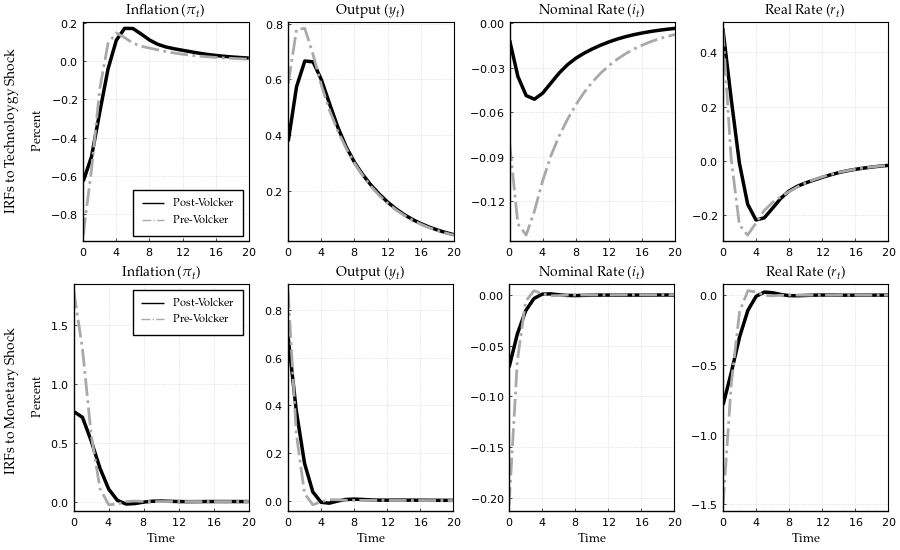

In [20]:
title1 = Plots.plot(ylabel     = "IRFs to Technoloygy Shock",
             guidefont  = font(10),
             grid       = false, showaxis = false,
             bottom_margin = 20Plots.px)
title2 = Plots.plot(ylabel     = "IRFs to Monetary Shock",
             guidefont  = font(10),
             grid       = false, showaxis = false,
             bottom_margin = -50Plots.px,
             top_margin = 30Plots.px)

p1 = Plots.plot(0:T,[σa*pi[1:T+1,1],σa*pi_pre[1:T+1,1]],
        title           = L"Inflation ($\pi_t$)",
        ylabel          = "Percent",
        guidefont       = font(9),
        yticks          = -1:0.2:0.3,
        label           = ["Post-Volcker" "Pre-Volcker"],
        legend          = :bottomright,
        legendfont      = font(8),
        color           = [:black :darkgray],
        linestyle       = [:solid :dashdot],
        )
p2 = Plots.plot(0:T,[σa*y[1:T+1,1],σa*y_pre[1:T+1,1]],
        title           = L"Output ($y_t$)",
        legend          = false,
        color           = [:black :darkgray],
        linestyle       = [:solid :dashdot],
        )
p3 = Plots.plot(0:T,[σa*i[1:T+1,1],σa*i_pre[1:T+1,1]],
        title           = L"Nominal Rate ($i_t$)",
        legend          = false,
        yticks          = -0.15:0.03:0.0,
        color           = [:black :darkgray],
        linestyle       = [:solid :dashdot],
        )
p4 = Plots.plot(0:T,[σa*r[1:T+1,1],σa*r_pre[1:T+1,1]],
        title           = L"Real Rate ($r_t$)",
        legend          = false,
        color           = [:black :darkgray],
        linestyle       = [:solid :dashdot],
        )
p5 = Plots.plot(0:T,[-σu*pi[1:T+1,2],-σu_pre*pi_pre[1:T+1,2]],
        title           = L"Inflation ($\pi_t$)",
        ylabel          = "Percent",
        xlabel          = "Time",
        guidefont       = font(9),
        label           = ["Post-Volcker" "Pre-Volcker"],
        legend          = :topright,
        legendfont      = font(8),
        color           = [:black :darkgray],
        linestyle       = [:solid :dashdot],
        )
p6 = Plots.plot(0:T,[-σu*y[1:T+1,2],-σu_pre*y_pre[1:T+1,2]],
        title           = L"Output ($y_t$)",
        xlabel          = "Time",
        guidefont       = font(9),
        legend          = false,
        color           = [:black :darkgray],
        linestyle       = [:solid :dashdot],
        )
p7 = Plots.plot(0:T,[-σu*i[1:T+1,2],-σu_pre*i_pre[1:T+1,2]],
        title           = L"Nominal Rate ($i_t$)",
        xlabel          = "Time",
        guidefont       = font(9),
        legend          = false,
        color           = [:black :darkgray],
        linestyle       = [:solid :dashdot],
        )
p8 = Plots.plot(0:T,[-σu*r[1:T+1,2],-σu_pre*r_pre[1:T+1,2]],
        title           = L"Real Rate ($r_t$)",
        xlabel          = "Time",
        guidefont       = font(9),
        legend          = false,
        color           = [:black :darkgray],
        linestyle       = [:solid :dashdot],
        )

l = @layout [
            a{0.001w} Plots.grid(1,4)
            a{0.001w} Plots.grid(1,4)
            ]

Plots.plot(title1,p1,p2,p3,p4,title2,p5,p6,p7,p8,
        layout      = l,
        gridstyle   = :dot,
        gridalpha   = 0.2,
        lw          = [2.5 2],
        titlefont   = font(10),
        xticks      = (0:4:T),
        xlim        = (0,T),
        tickfont    = font(8),
        size        = (900,550),
        framestyle  = :box)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*